In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
df = pd.read_csv('train_csv.csv')

In [0]:
df.reset_index(drop=True, inplace=True)

In [196]:
df.shape

(80, 3)

In [197]:
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


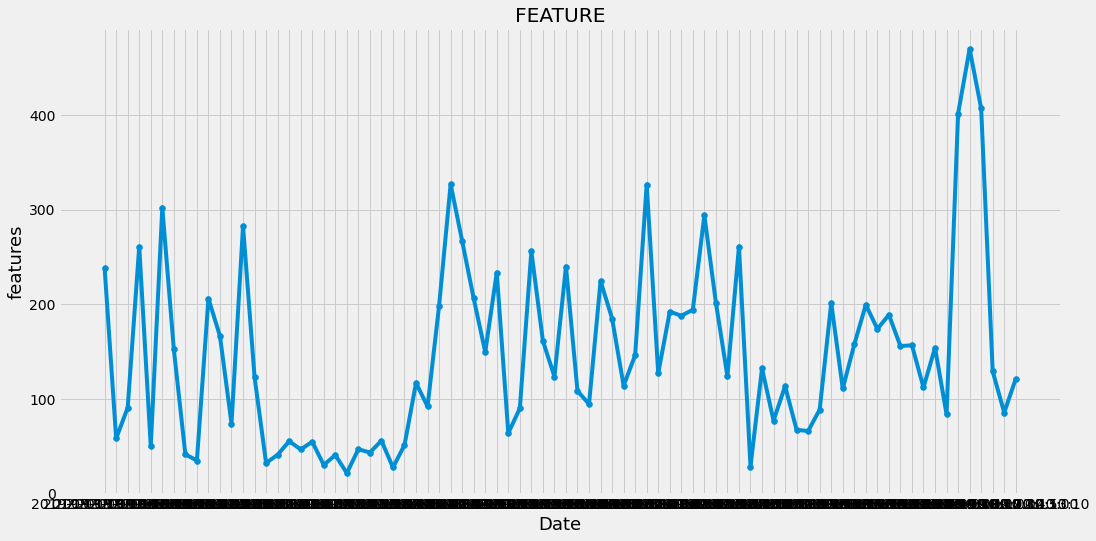

In [198]:
#Visualize the features
plt.figure(figsize=(16,8))
plt.title('FEATURE')
plt.scatter(df['time'], df['feature'])
plt.plot(df['time'], df['feature'])

plt.xlabel('Date',fontsize=18)
plt.ylabel('features',fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'feature' column
data = df.filter(['feature'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)

In [200]:
training_data_len

64

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)


In [202]:
len(scaled_data)

80

In [203]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

64

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i,0])
    y_train.append(train_data[i,0])

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [0]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [208]:
#Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 10ms/step - loss: 0.0986
Epoch 2/100
63/63 [==============================] - 0s 119us/step - loss: 0.0897
Epoch 3/100
63/63 [==============================] - 0s 187us/step - loss: 0.0819
Epoch 4/100
63/63 [==============================] - 0s 176us/step - loss: 0.0737
Epoch 5/100
63/63 [==============================] - 0s 163us/step - loss: 0.0661
Epoch 6/100
63/63 [==============================] - 0s 170us/step - loss: 0.0591
Epoch 7/100
63/63 [==============================] - 0s 190us/step - loss: 0.0529
Epoch 8/100
63/63 [==============================] - 0s 177us/step - loss: 0.0472
Epoch 9/100
63/63 [==============================] - 0s 212us/step - loss: 0.0427
Epoch 10/100
63/63 [==============================] - 0s 196us/step - loss: 0.0388
Epoch 11/100
63/63 [==============================] - 0s 206us/step - loss: 0.0363
Epoch 12/100
63/63 [==============================] - 0s 188us/step - loss: 0.0356
Epoch 13/100
6

In [209]:
#Test data set
test_data = scaled_data[training_data_len - 1: , : ]
len(test_data)

17

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(1,len(test_data)):
    x_test.append(test_data[i-1:i,0])

In [0]:
# x_test

In [0]:
# y_test

In [213]:
len(x_test)

16

In [214]:
len(y_test)

16

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [218]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

112.85237067491049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


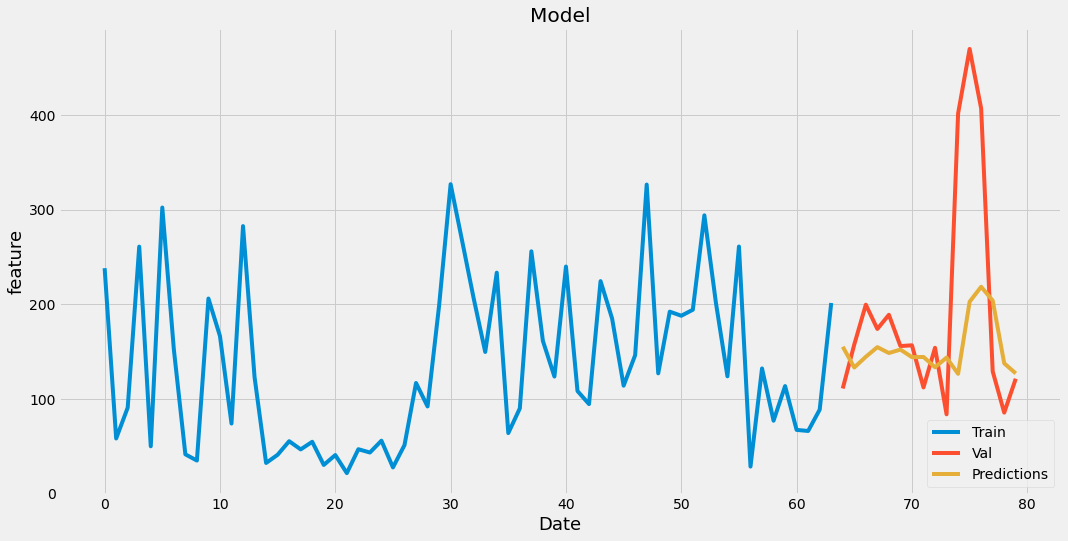

In [219]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('feature', fontsize=18)
plt.plot(train['feature'])
plt.plot(valid[['feature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [220]:
#Show the valid and predicted prices
valid

,feature,Predictions
64,110.79,154.935226
65,157.37,132.981155
66,199.37,144.326691
67,173.72,154.500504
68,188.69,148.293900
69,155.62,151.918839
70,156.46,143.901581
71,111.91,144.105621
72,153.83,133.254654
73,83.51,143.466644


In [0]:
df1 = pd.read_csv('train_csv.csv')
df2 = pd.read_csv('test_csv.csv')


valid_csv = pd.concat([df1, df2])

In [0]:
valid_csv.tail
valid_csv.to_csv('valid_csv.csv')

In [223]:
#Get the quote
feature_quote = pd.read_csv('valid_csv.csv')
#Create a new dataframe
new_df = feature_quote.filter(['feature'])

#Get teh last 60 day closing price 
last_1_days = new_df[79:80].values
#Scale the data to be values between 0 and 1
last_1_days_scaled = scaler.transform(last_1_days)
#Create an empty list
X_test = []
#Append teh past 1 days
X_test.append(last_1_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[135.50247]]
